In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Inhomogneous mesh

We will be modeling the 1D poisson equation but now, when the mesh is made of two diffrent media (materials).

In [2]:
# We make a function for producing the typical forward difference matrix
def forward_diff_mat(nodes):
    return np.diag([-2]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1)

In [3]:
# Similar to as last time, we will use a 1D mesh.

nodes = 5 #Number of nodes we will have in our simulation domain.
length = 1 #m, the length of our domain.
a = length/(nodes-1) # The step size 'a', in metres. 

eps_0 = 0.5 # epsilon for material 0
eps_1 = 10 # epsilon for material 1

split_ratio = 0.6

nodes_0 = round(split_ratio*nodes)
nodes_1 = round((1-split_ratio)*nodes)

print("# material 0 nodes = " + str(nodes_0) + ", # material 1 nodes = " + str(nodes_1))

# material 0 nodes = 3, # material 1 nodes = 2


To create the Poisson matrix we will follow this recipie:

1. Make 2 small square materacies, one for each material of size nodes_in_material+1
2. Modify each of the square matracies to include the interaction point
3. Pad the square matracies a larger square matrix of size nodes
4. Multiply the bigger matracies with ther respective epsilon values
5. Add the two matracies to give our final poisson matrix


Note this is absolutly not the only way to do this and may not even be the easiest. You may find using nested loops is more intuative to you.

In [4]:
# Making matrix 0's diagonal
mat_0 = forward_diff_mat(nodes_0+1)
print(mat_0)

# Making the interaction matrix
mat_0_interact = np.zeros(mat_0.shape)
mat_0_interact[-1][-1] = 1
mat_0_interact[-2][-2] = 1
mat_0_interact[-2][-1] = -1
print(mat_0_interact)

# Finishing matrix 0
mat_0_fixed = mat_0 + mat_0_interact

print(mat_0_fixed)

[[-2  1  0  0]
 [ 1 -2  1  0]
 [ 0  1 -2  1]
 [ 0  0  1 -2]]
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -1.  0.]
 [ 0.  0.  1. -1.]]


In [5]:
# Making matrix 1's diagonal
mat_1 = forward_diff_mat(nodes_1+1)
print(mat_1)

# Making the interaction matrix
mat_1_interact = np.zeros(mat_1.shape)
mat_1_interact[0][0] = 1
mat_1_interact[1][1] = 1
mat_1_interact[1][0] = -1
print(mat_1_interact)

# Finishing matrix 1
mat_1_fixed = mat_1 + mat_1_interact

print(mat_1_fixed)

[[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]]
[[ 1.  0.  0.]
 [-1.  1.  0.]
 [ 0.  0.  0.]]
[[-1.  1.  0.]
 [ 0. -1.  1.]
 [ 0.  1. -2.]]


In [6]:
# Padding matrix 0 back to its correct size and multiplying by epsilon
mat_0_full = np.pad(mat_0_fixed, ((0,nodes-nodes_0-1) , (0,nodes-nodes_0-1)), mode = 'constant', constant_values=(0, 0))
mat_0_full = mat_0_full*eps_0
print(mat_0_full)

[[-1.   0.5  0.   0.   0. ]
 [ 0.5 -1.   0.5  0.   0. ]
 [ 0.   0.5 -0.5  0.   0. ]
 [ 0.   0.   0.5 -0.5  0. ]
 [ 0.   0.   0.   0.   0. ]]


In [7]:
# Padding matrix 1 back to its correct size and multiplying by epsilon
mat_1_full = np.pad(mat_1_fixed, ((nodes-nodes_1-1,0) , (nodes-nodes_1-1,0)), mode = 'constant', constant_values=(0, 0))
mat_1_full = mat_1_full*eps_1
print(mat_1_full)

[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0. -10.  10.   0.]
 [  0.   0.   0. -10.  10.]
 [  0.   0.   0.  10. -20.]]


[[ -1.    0.5   0.    0.    0. ]
 [  0.5  -1.    0.5   0.    0. ]
 [  0.    0.5 -10.5  10.    0. ]
 [  0.    0.    0.5 -10.5  10. ]
 [  0.    0.    0.   10.  -20. ]]


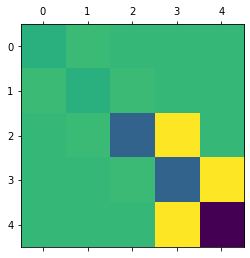

In [8]:
# Combining matrix 0 and 1 into our Poisson matrix
Poisson_Matrix = mat_0_full + mat_1_full
print(Poisson_Matrix)
plt.matshow(Poisson_Matrix)

Text(0, 0.5, 'Voltage, V')

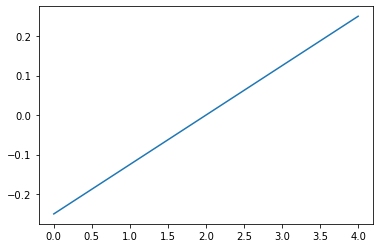

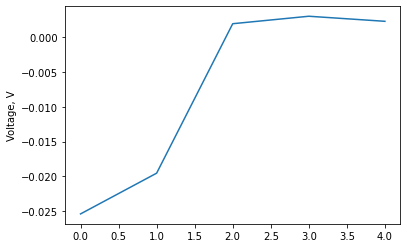

In [9]:
# Now we just solve the matrix like normal

# Construct rho
centre = length/2
rho = np.zeros(nodes)
for i in range(nodes):
    x = i*a - centre # Find our position relative to centre
    rho[i] = 0.5*x

plt.figure()
plt.plot(rho)

rho_mod = rho*-1*a**2

# Finally, let's generate a solution via matrix inversion. As always, this is quite a slow method (but we're lazy :) )
V = np.linalg.solve(Poisson_Matrix, rho_mod)
plt.figure()
plt.plot(V)
plt.ylabel('Voltage, V')

**Homework**

- Play around with the mesh node values, split ratio and epsilon values
- Try another method of creating the Poisson Matrix
- Have the more than one material transition point (Hard)
- Add an extra material (Hard)

# Moving to 2D

Here we will be simulating a 2D poisson. This time the Poisson matrix is easy to make but now setting up rho will give us some trouble.

[[-4  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -4  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -4  1  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1 -4  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1 -4  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1 -4  1  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1 -4  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1 -4  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1 -4  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  1 -4  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1 -4  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  1 -4  1  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1 -4  1  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1 -4  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  1 -4  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  1 -4]]


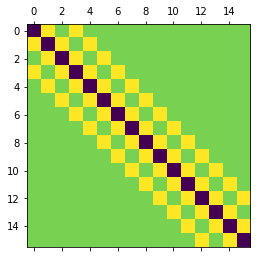

In [10]:
# This time we will be setting the number of nodes in each direction and the "a" value directly

x_nodes = 4 #Number of x nodes
y_nodes = 4 #Number of x nodes
nodes = x_nodes*y_nodes
a = 1.0 # The step size 'a', in metres.

# We need to include two additional offset diagonals  
# Note that \ is used to split a python commanand over multiple lines, its is purly for aesthetic use
Poisson_Matrix =  np.diag([-4]*nodes,0) + np.diag([1]*(nodes-1),1) + np.diag([1]*(nodes-1),-1) \
                                        + np.diag([1]*(nodes-3),3) + np.diag([1]*(nodes-3),-3)
    
print(Poisson_Matrix)
plt.matshow(Poisson_Matrix)

In [11]:
# A function which will show the matrix as a plot with a colour bar, so we can read the values
def matshow_cbar(mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(mat)
    fig.colorbar(cax)

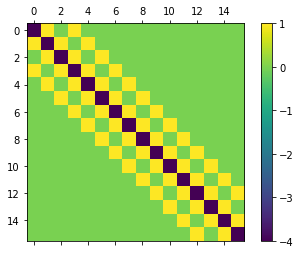

In [12]:
matshow_cbar(Poisson_Matrix)

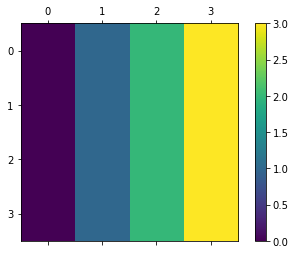

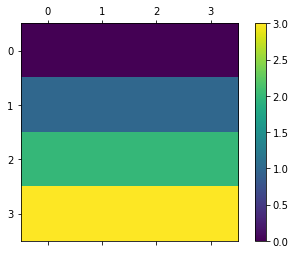

In [13]:
# Use meshgrid to make two matracies which we can manipulate to make our 2d rho
x, y = np.meshgrid(range(x_nodes), range(y_nodes))

matshow_cbar(x)
matshow_cbar(y)

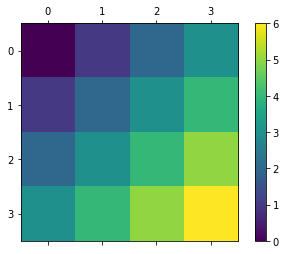

In [16]:
# Our rho function, try out some others
mat_rho = x + y

matshow_cbar(mat_rho)

In [17]:
# we ned rho as a vector of the form [v11,v21,v31, ..., v12, ...]
print(mat_rho)
rho = mat_rho.flatten()
print(rho)

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]
[0 1 2 3 1 2 3 4 2 3 4 5 3 4 5 6]


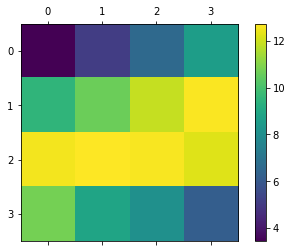

In [18]:
# finally we add our factors to rho and solve the equation
eps = 1.0

rho_mod = rho*-1*a**2*eps

V = np.linalg.solve(Poisson_Matrix, rho_mod)

# we then need to ravel V back into a 2d matrix
mat_V = V.reshape(mat_rho.shape)

matshow_cbar(mat_V)

**Homework**

- Make sure you understand why the matricies need to be manipulate the way they were.
- Try out some other rho functions
- Try out different numbers of nodes

# Time dependant equations  

Here we will simulate the 1D Heat equation which is time dependant.

$$ \frac{\partial T}{\partial t} =\alpha \frac{\partial^2 T}{\partial x^2}$$

This can be done using 2 methods
1. Running through each time time step (Time evolution)
2. The Crank-Nicholson method

## Time evolution

Our scale term is = 0.0001


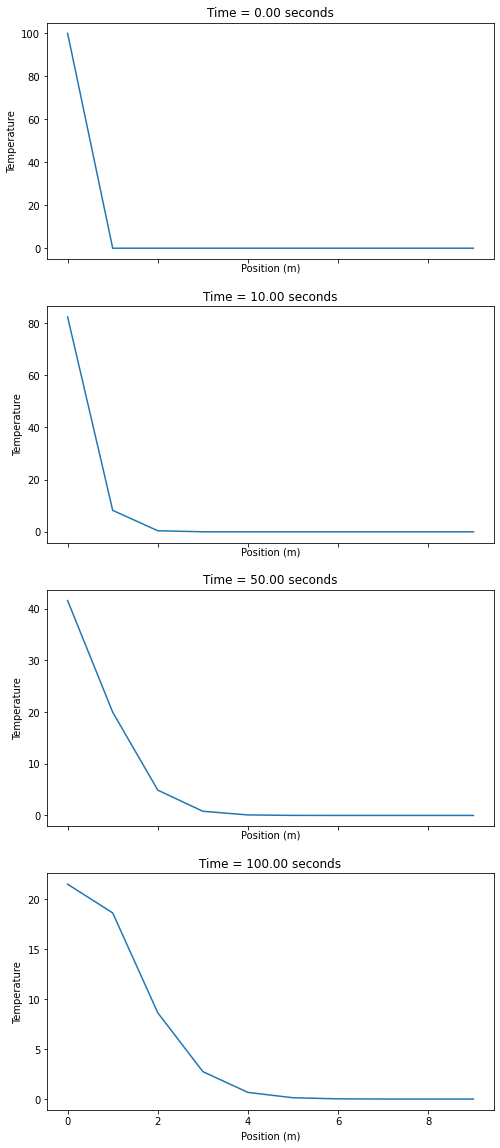

In [19]:
nodes = 10
timestep = 0.01
length = 10
duration = 100 # second
a = length/nodes
alpha = 0.01 # Heat transfer coefficient


Tridiag = forward_diff_mat(nodes) # making our tridiagonal matrix

# Create our vector of initial temperatures
T_init = np.zeros(nodes)
T_init[0] = 100 # Just putting the edge to be 100 degrees (at the moment)

scale_term = alpha * timestep / (a**2)
print("Our scale term is = " + str(scale_term))
    
num_timesteps = round(duration/timestep) + 1

# Running our code for each timestep and saving every "frame" of data to T_list
T = np.zeros(nodes)
T_list = list()
for i in range(num_timesteps):
    if i == 0:
        # This is our initial condition, so we will use T_init
        T = T_init
    else:
        T = T + scale_term*np.matmul(Tridiag,T)
        
    T_list.append(T)

# Let's generate an x-vector to plot as our x axis:
x_vec = np.arange(nodes)*a
        
# A list of points in T_list we want to plot, instead of hardcoding numbers I am dynamically finding good spots to plot using the size of T_list
step_list =[0,len(T_list)//10,len(T_list)//2,len(T_list)-1]

fig, axs = plt.subplots(len(step_list),sharex=True, figsize=(8, 20))
fig.subplots_adjust(hspace=0.2)
for i, stepnum in enumerate(step_list):
    axs[i].plot(x_vec,T_list[stepnum])
    axs[i].set_xlabel('Position (m)')
    axs[i].set_ylabel('Temperature')
    axs[i].set_title('Time = %.2f seconds' % ((stepnum)*timestep))

## Crank-Nicholson method

r = 5e-05


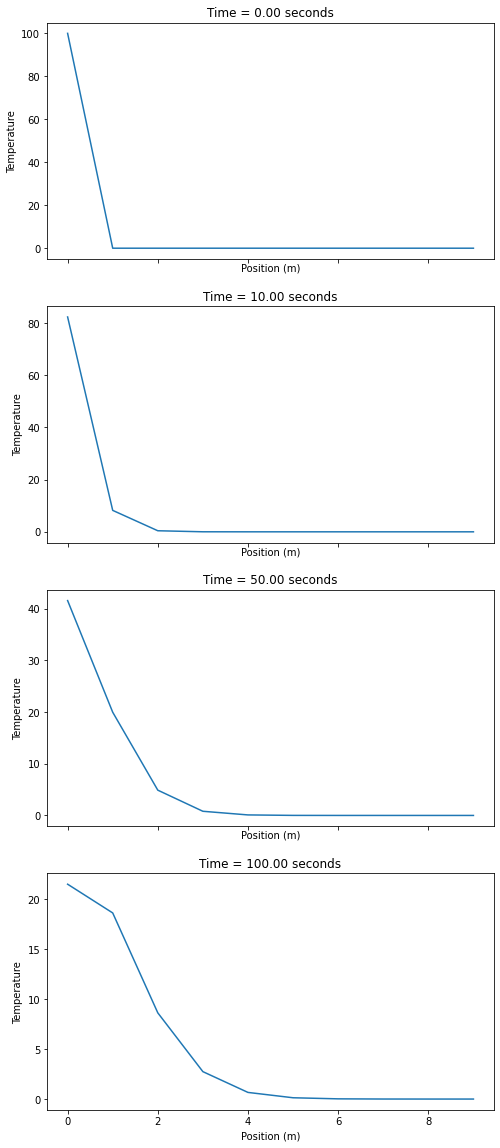

In [20]:
nodes = 10
timestep = 0.01
length = 10
duration = 100 # second
a = length/nodes
alpha = 0.01 # Heat transfer coefficient

# nodes = 300
# timestep = 0.0001
# length = 10
# duration = 1 # second
# a = length/nodes
# alpha = 1 # Heat transfer coefficient

# Create our vector of initial temperatures
T_init = np.zeros(nodes)
T_init[0] = 100 # Just putting the edge to be 100 degrees (at the moment)

# The CN method has two matrices, which I will call the front and back matrices
# They are generated by passing an 'r' parameter to them
r = (alpha*timestep)/(2*a**2)

print("r = " + str(r))

front_mat = np.diag([1+2*r]*nodes,0) + np.diag([-1*r]*(nodes-1),1) + np.diag([-1*r]*(nodes-1),-1)
back_mat = np.diag([1-2*r]*nodes,0) + np.diag([r]*(nodes-1),1) + np.diag([r]*(nodes-1),-1)

num_timesteps = round(duration/timestep) + 1

# Running our code for each timestep and saving every "frame" of data to T_list
T = np.zeros(nodes)
T_list = list()
for i in range(num_timesteps):
    if i == 0:
        # This is our initial condition, so we will use T_init
        T = T_init
    else:
        B = np.matmul(back_mat,T)
        T = np.linalg.solve(front_mat,B)
        
    T_list.append(T)

# Let's generate an x-vector to plot as our x axis:
x_vec = np.arange(nodes)*a
        
# A list of points in T_list we want to plot, instead of hardcoding numbers I am dynamically finding good spots to plot using the size of T_list
step_list = [0,len(T_list)//10,len(T_list)//2,len(T_list)-1]

fig, axs = plt.subplots(len(step_list),sharex=True, figsize=(8, 20))
fig.subplots_adjust(hspace=0.2)
for i, stepnum in enumerate(step_list):
    axs[i].plot(x_vec,T_list[stepnum])
    axs[i].set_xlabel('Position (m)')
    axs[i].set_ylabel('Temperature')
    axs[i].set_title('Time = %.2f seconds' % ((stepnum)*timestep))

**Homework**
1. Vary the initial temperature conditions and any other parameters
2. Show that time evolution becomes unstable for large time steps but CN does not 
2. Find a better way to plot time varying data than a big stack of plots
3. Determine **when** the system reaches a thermal equilibrium